<a href="https://colab.research.google.com/github/ManuelsAguilera/Artiarana/blob/main/Proyecto_Metodos_Numericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto metodos numericos

## resolucion
A partir del siguiente diagrama, encontrar la solucion de flujos de potencia por medio de *Newton-Raphson*:

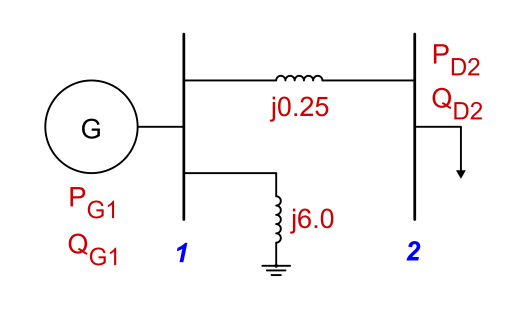

Los datos son los siguientes:

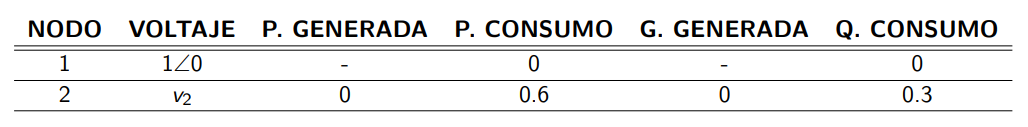


documentacion:

https://www.sympy.org/es/features.html

Primero debemos de obtener las ecuaciones de flujo de potencia

Paso-1 Obtener matriz de admitancia Y bus
La matriz de impedancia (Z) se obtiene tomando la inversa de la matriz de admitancia (Y).

1.0) crear una funcion para determinar inversos

1.1) separar parte real de la imaginaria en la matriz
Paso-1 Obtener matriz de admitancia Y bus
La matriz de impedancia (Z) se obtiene tomando la inversa de la matriz de admitancia (Y).

1.0) crear una funcion para determinar inversos

1.1) separar parte real de la imaginaria en la matriz


In [ ]:
# Función para calcular la inversa de una matriz compleja
def inversa_matriz(matriz):
    try:
        inversa = sp.Matrix(matriz).inv()
        return inversa
    except sp.MatrixDeterminantIsZero:
        return None


# Función para separar partes reales e imaginarias de una matriz compleja
def separar_real_imag_matriz(matriz_compleja):
    partes_reales = matriz_compleja.applyfunc(lambda x: sp.re(x))
    partes_imaginarias = matriz_compleja.applyfunc(lambda x: sp.im(x))
    return partes_reales, partes_imaginarias

In [ ]:
import sympy as sp

# Nuevas impedancias de los elementos
Z1 = 6j  # Impedancia del primer elemento (6j ohmios)
Z2 = 0.25j  # Impedancia del segundo elemento (0.25j ohmios)

# Matriz de impedancia
Z_matrix = sp.Matrix([[Z1, -Z1], [-Z1, Z1 + Z2]])
Y_matrix = inversa_matriz(Z_matrix)

if Y_matrix is not None:
    print("Matriz de Admitancia:")
    print(Y_matrix)
else:
    print("La matriz de impedancia no tiene inversa, lo que significa que no se puede calcular la matriz de admitancia.")



partes_reales, partes_imaginarias = separar_real_imag_matriz(Y_matrix)

print("Partes Reales:")
print(partes_reales)
print("Partes Imaginarias:")
print(partes_imaginarias)



Matriz de Admitancia:
Matrix([[-4.16666666666667*I, -4.0*I], [-4.0*I, -4.0*I]])
Partes Reales:
Matrix([[0, 0], [0, 0]])
Partes Imaginarias:
Matrix([[-4.16666666666667, -4.00000000000000], [-4.00000000000000, -4.00000000000000]])


In [ ]:
'''
Voy a modularizar el code anterior, para invocarlo mas generalmente
'''
def hallarEcus(Z1,Z2):
    # Matriz de impedancia
  Z_matrix = sp.Matrix([[Z1, -Z1], [-Z1, Z1 + Z2]])
  Y_matrix = inversa_matriz(Z_matrix)

  if Y_matrix is not None:
      print("Matriz de Admitancia:")
      print(Y_matrix)
  else:
      print("La matriz de impedancia no tiene inversa, lo que significa que no se puede calcular la matriz de admitancia.")

  partes_reales, partes_imaginarias = separar_real_imag_matriz(Y_matrix)

    # Definimos las variables para voltaje (v) y angulo (p)
  p, v = sp.symbols('p v', real=True)

  # Define las ecuaciones en términos de p y v
  ecuacion_1 = 4 * v * sp.sin(p) + 0.6
  ecuacion_2 = 4 * sp.Pow(v, 2) - 4 * v * sp.cos(p) + 0.3
  return ecuacion_1,ecuacion_2

In [ ]:
# Definimos las variables para voltaje (v) y angulo (p)
p, v = sp.symbols('p v', real=True)

# Define las ecuaciones en términos de p y v
ecuacion_1 = 4 * v * sp.sin(p) + 0.6
ecuacion_2 = 4 * sp.Pow(v, 2) - 4 * v * sp.cos(p) + 0.3

print("Ecuación 1: ", ecuacion_1)
print("Ecuación 2: ", ecuacion_2)
print('\n')
print("Ecuación 1 diferenciada p: ", ecuacion_1.diff(p))
print("Ecuación 1 diferenciada v: ", ecuacion_1.diff(v))
print()
print("Ecuación 2 diferenciada p: ", ecuacion_2.diff(p))
print("Ecuación 2 diferenciada v: ", ecuacion_2.diff(v))

Ecuación 1:  4*v*sin(p) + 0.6
Ecuación 2:  4*v**2 - 4*v*cos(p) + 0.3


Ecuación 1 diferenciada p:  4*v*cos(p)
Ecuación 1 diferenciada v:  4*sin(p)

Ecuación 2 diferenciada p:  4*v*sin(p)
Ecuación 2 diferenciada v:  8*v - 4*cos(p)


In [ ]:
def get_jacobian_2(function,v,p): #obtiene jacobiana de dos componentes, para una funcion de varias variables.
  diff1 = function.diff(p) # Angulo
  diff2 = function.diff(v) # Voltaje
  return [diff2,diff1]

In [ ]:
def calcular_jacobiano(ecuacion, variables):
    jacobiano = sp.Matrix([[sp.diff(f, var) for var in variables] for f in variables])
    return jacobiano

In [ ]:

def newton_raphson_2(pila_valores, vec_ecu,jacobiano, tol, iter = 1):
  # Obtenemos los valores para p y v
  p_anterior = pila_valores[-1][0]
  v_anterior = pila_valores[-1][1]
  #print("p_anterior: ",p_anterior)
  #print("v_anterior: ",v_anterior)

  # Calculamos el valor numerico del jacobiano
  jacobiano_num = jacobiano.subs({p:p_anterior, v:v_anterior})

  # Calculamos el error
  error_nuevo =  - vec_ecu.subs({p:p_anterior, v:v_anterior})

  # Calcular incrementos
  incrementos = jacobiano_num.inv() * error_nuevo

  # Obtener valores para la siguiente iteracion
  p_nuevo = p_anterior + incrementos[0]
  v_nuevo = v_anterior + incrementos[1]

  # Apilar para la siguiente iteracion
  pila_valores.append(sp.Matrix([p_nuevo,v_nuevo]))


  # Comprobar tolerancia
  if ( (abs(incrementos[0]) < tol) and (abs(incrementos[1]) < tol) ):
    print("FIN")
    return p_nuevo,v_nuevo,iter;

  # si no, seguir iterando
  iter += 1
  return newton_raphson_2(pila_valores,vec_ecu,jacobiano,tol,iter)


In [ ]:
'''
Devuelve tan solo las iteraciones
'''
def newton_raphson_iter(pila_valores,pila_errores, vec_ecu,jacobiano, tol, iter = 1):
  # Obtenemos los valores para p y v
  p_anterior = pila_valores[-1][0]
  v_anterior = pila_valores[-1][1]
  #print("p_anterior: ",p_anterior)
  #print("v_anterior: ",v_anterior)

  # Calculamos el valor numerico del jacobiano
  jacobiano_num = jacobiano.subs({p:p_anterior, v:v_anterior})

  # Calculamos el error
  error_nuevo =  - vec_ecu.subs({p:p_anterior, v:v_anterior})

  # Calcular incrementos
  incrementos = jacobiano_num.inv() * error_nuevo

  # Obtener valores para la siguiente iteracion
  p_nuevo = p_anterior + incrementos[0]
  v_nuevo = v_anterior + incrementos[1]

  # Apilar para la siguiente iteracion
  pila_valores.append(sp.Matrix([p_nuevo,v_nuevo]))
  pila_errores.append(sp.Matrix(error_nuevo))

  # Comprobar tolerancia
  if ( (abs(incrementos[0]) < tol) and (abs(incrementos[1]) < tol) ):
    return iter;
  if (iter == 60):
    return iter;
  # si no, seguir iterando
  iter += 1
  return newton_raphson_iter(pila_valores,vec_ecu,jacobiano,tol,iter)

In [ ]:
# Paso-3 formulación del método de Newton-Raphson a partir de las ecuaciones obtenidas anteriormente

# Filas del jacobiano
fila_1 = get_jacobian_2(ecuacion_1, p, v)
fila_2 = get_jacobian_2(ecuacion_2, p, v)

# Crear jacobiano
jacobian = sp.Matrix([fila_1,fila_2])

# Crear vector de ecuaciones
vector_error = sp.Matrix([ecuacion_1, ecuacion_2])

# Inicializacion de valores para la primera iteracion
pila_errores = [sp.Matrix([0,0])]
pila_valores = [sp.Matrix([0,1])]

tolerancia = int(input("Leer tolerancia en magnitud "))
tolerancia = 10**(-1-tolerancia)
# Obtener soluciones
solucion_1, solucion_2,iter = newton_raphson_2(pila_valores, vector_error,jacobian, tolerancia)

# Mostrar soluciones
print("solucion 1: ",solucion_1)
print("solucion 2: ",solucion_2)
print("Con ",iter," iteraciones")

Leer tolerancia en magnitud 17
FIN
solucion 1:  -0.166875853347671
solucion 2:  0.903057298179541
Con  7  iteraciones


In [ ]:
print("La ecuacion 1 al ser evaluada nos da")
print(ecuacion_1.subs({v:solucion_2,p:solucion_1}))
print("La ecuacion 2 al ser evaluada nos da")
print(ecuacion_2.subs({v:solucion_2,p:solucion_1}))

In [ ]:
import numpy as np
import pandas as pd
import sympy as sp  # Asegúrate de que sympy esté importado

# Definir las funciones necesarias, como newton_raphson_2, get_jacobian_2, ecuacion_1, ecuacion_2, etc.

def nearly_equal(a, b, sig_fig=5):
    return a == b or int(a * 10**sig_fig) == int(b * 10**sig_fig)

pi = np.pi

# Crear un DataFrame para almacenar las soluciones similares
similar_sols = pd.DataFrame(columns=['Solución 1', 'Solución 2', 'Iteraciones'])

for i in np.arange(-pi/2, pi/2, pi/4):
    for v in np.arange(0.8, 1.2, 0.1):
        # Configurar pila_errores y pila_valores con valores iniciales i y v
        pila_errores = [sp.Matrix([0, 0])]
        pila_valores = [sp.Matrix([i, v])]

        # Obtener soluciones
        sol_temp1, sol_temp2, iteraciones = newton_raphson_2(pila_valores, pila_errores, vector_error, jacobian, tolerancia)

        # Verificar si las soluciones son válidas y guardarlas en el DataFrame
        if nearly_equal(solucion_1, solucion_2):
            similar_sols = similar_sols.append({'Solución 1': solucion_1, 'Solución 2': solucion_2, 'Iteraciones': iteraciones}, ignore_index=True)

# Mostrar las soluciones similares
print(similar_sols)


In [ ]:


def numIteraciones( vector_error, jacobian):
    data = {'angle': [], 'volts': [], 'iteration': []}
    pi_num = np.pi
    error_diez = 0.00000000001

    for p in np.arange(0, 2 * pi_num+ pi_num/26, pi_num /26 ):
        initial_volts = list()
        iteration = list()
        for v in np.arange(1, 26,1.0):
            data['angle'].append(p)
            data['volts'].append(v)
            valores_test = [[p,v]]
            data['iteration'].append(newton_raphson_iter(valores_test, [0,0], vector_error, jacobian, error_diez))

    return pd.DataFrame(data)

result_iters = numIteraciones(vector_error,jacobian)
result_iters


In [ ]:
result_iters.to_csv("metodos_iteraciones.csv")

In [ ]:
result_iters.groupby(by=["angle"])

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))  # Aumentar el tamaño del gráfico
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(result_iters['volts'], result_iters['angle'], result_iters['iteration'], cmap='viridis')
ax.set_xlabel('Volts')
ax.set_ylabel('Angle')
ax.set_zlabel('Iterations')
plt.title('3D Surface Plot: Iterations vs. Volts and Angle')
plt.show()


In [ ]:
# Create a line plot for Iterations vs Angle
angle_iter_df = result_iters
angle_iter_df = angle_iter_df.groupby(["angle"]).mean()
angle_iter_df = angle_iter_df.drop(['volts'],axis=1)
angle_iter_df

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(angle_iter_df)
plt.xlabel('Angle')
plt.ylabel('Iterations')
plt.title('Iterations vs Angle')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a line plot for Iterations vs Angle
volt_iter_df = result_iters
volt_iter_df = volt_iter_df.groupby(["volts"]).mean()
volt_iter_df = volt_iter_df.drop(['angle'],axis=1)
volt_iter_df

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(volt_iter_df)
plt.xlabel('Volts')
plt.ylabel('Iterations')
plt.title('Iterations vs volts')
plt.legend()
plt.grid(True)
plt.show()

## Intento de grafica (solo es un test)

In [ ]:
# manu instala linux en mi pc y me convierto en peruano máximo